In [3]:
#Importamos Librerias 

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [4]:
# Paso 1: Carga y preprocesamiento de Datos
# a. Cargar el dataset de imágenes.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dimensiones de los conjuntos de datos de MNIST
print('Entrenamiento:')
print(f'   x_train: {x_train.shape}')
print(f'   y_train: {y_train.shape}')
print('Prueba:')
print(f'   x_test: {x_test.shape}')
print(f'   y_test: {y_test.shape}')



Entrenamiento:
   x_train: (60000, 28, 28)
   y_train: (60000,)
Prueba:
   x_test: (10000, 28, 28)
   y_test: (10000,)


In [5]:
# Ejemplos de categorías
print(np.random.choice(y_train,10))

[4 1 5 7 7 6 3 3 1 3]


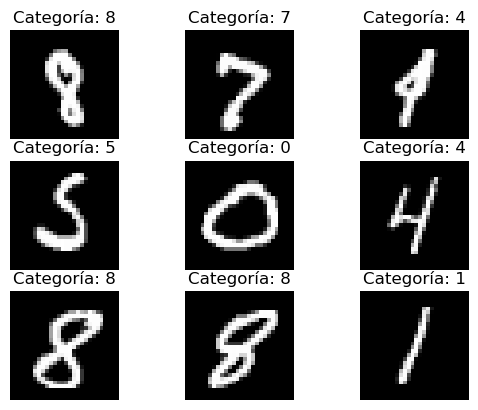

In [6]:
# Selección aleatoria de 9 imágenes y su categoría
idx = np.random.choice(60000,9)
fig, axes = plt.subplots(3,3)
for i, axis in enumerate(axes.flat):
  axis.imshow(x_train[idx[i],:,:].reshape(28,28), cmap='gray');
  axis.axis('off')

  titulo = f'Categoría: {y_train[idx[i]]}'
  axis.set_title(titulo)

In [7]:
# b. Normalizar las imágenes para que los valores de los píxeles estén entre 0 y 1.
# Normalización de los pixeles para entrenamiento
x_train = x_train.astype('float32')/255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

# Normalización de los pixeles para prueba
x_test = x_test.astype('float32')/255.
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [8]:
# c. Dividir el dataset en conjuntos de entrenamiento y validación.
# Ajuste de dimensiones de imágenes de entrada a 28x28x1
# Las originales tienen dimensiones 28x28

print(f'Tamaños originales: {x_train.shape}, {x_test.shape}')
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(f'Tamaños ajustados: {x_train.shape}, {x_test.shape}')
x_train, x_val = x_train[:50000], x_train[50000:]

Tamaños originales: (60000, 28, 28, 1), (10000, 28, 28, 1)
Tamaños ajustados: (60000, 28, 28, 1, 1), (10000, 28, 28, 1, 1)


In [9]:
# Convertir cada categoría a representación one-hot
# Se usa en problemas de clasificación multiclase donde las etiquetas de las clases son categóricas y no numéricas
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualizar nuevas categorías (aleatorio)
idx = np.random.choice(10000,4)
for i in idx:
  print(f'Categoría: {y_test[i]}')

Categoría: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Categoría: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Categoría: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Categoría: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# Paso 2: Definición del Autoencoder convolucional
# a. Definir las dimensiones de las imágenes de entrada (28, 28, 1)
input_shape = (28, 28, 1)

# b. Definir el modelo del codificador
encoder = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same')
])

# c. Definir el modelo del decodificador
decoder = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Combina el codificador y el decodificador
autoencoder_input = Input(shape=input_shape)
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)
autoencoder = Model(autoencoder_input, decoded)

C:\Users\roage\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,785 (73.38 KB)

 Trainable params: 18,785 (73.38 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Paso 3: Entrenamiento del Codificador Automático
#Compilar el modelo
autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
#Entrenar el modelo
historia=autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_val, x_val))

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.8143 - loss: 0.0838 - val_accuracy: 0.8163 - val_loss: 0.0727
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8149 - loss: 0.0720 - val_accuracy: 0.8164 - val_loss: 0.0719
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8152 - loss: 0.0711 - val_accuracy: 0.8164 - val_loss: 0.0713
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8155 - loss: 0.0705 - val_accuracy: 0.8164 - val_loss: 0.0706
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.8151 - loss: 0.0700 - val_accuracy: 0.8164 - val_loss: 0.0701
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.8151 - loss: 0.0696 - val_accuracy: 0.8165 - val_loss: 0.0699
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8149 - loss: 0.0692 - val_accuracy: 0.8165 - val_loss: 0.0692
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.8148 - loss: 0.0688 - val_acc

In [16]:
# Definir gráfica de función de pérdida y exactitud por época (historia)
def graficar(historia):
  plt.figure(figsize=(15,5))

  loss = historia.history['loss']
  accuracy = historia.history['accuracy']
  test_loss = historia.history['val_loss']
  test_accuracy = historia.history['val_accuracy']
  epochs = historia.epoch

  plt.subplot(121)
  plt.plot(epochs,loss,label='train_loss')
  plt.plot(epochs,test_loss,'b--',label='test_loss')
  plt.legend()

  plt.subplot(122)
  plt.plot(epochs,accuracy,label='train_acc')
  plt.plot(epochs,test_accuracy,'b--',label='test_acc')
  plt.legend()

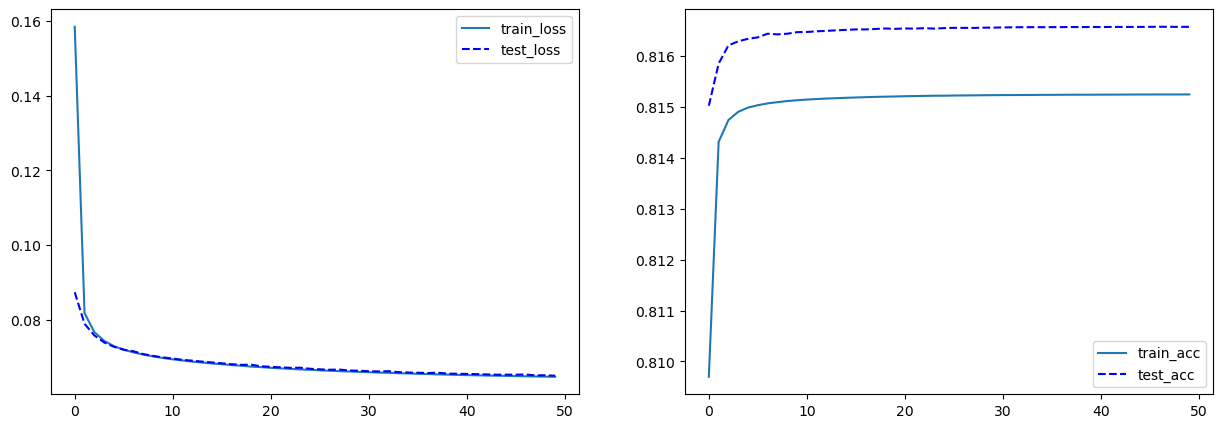

In [ ]:
# Imprimir gráfica de función de pérdida y exactitud por época (historia)
graficar(historia)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


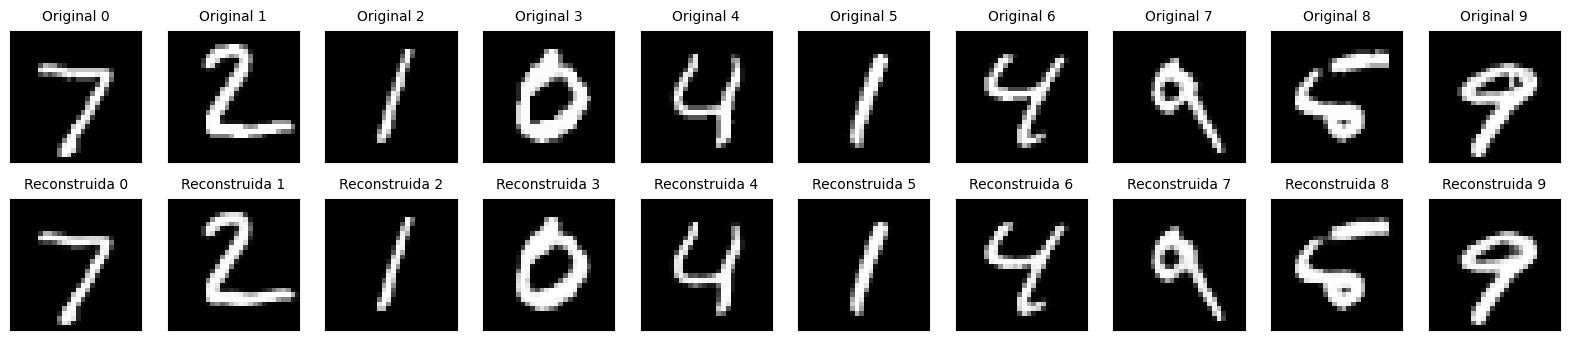

In [17]:
# Paso 4: Evaluación del Codificador Automático
decoded_imgs = autoencoder.predict(x_test)

# Visualizar un par de imágenes originales y reconstruidas
n = 10  # Número de imágenes a visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.text(0.5, 1.08, f'Original {i}', horizontalalignment='center', transform=ax.transAxes)


    # Reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.text(0.5, 1.08, f'Reconstruida {i}', horizontalalignment='center', transform=ax.transAxes)
plt.show()

In [ ]:
#Evaluar el modelo
loss, accuracy = autoencoder.evaluate(x_test, x_test)
print(f'Exactitud:{accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8218 - loss: 0.0637
Exactitud:81.45%
